# Imports

In [1]:
import src.acquire
import src.prepare

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

# Get and Prepare the Data

In [2]:
df = src.prepare.wrangle_zillow(src.acquire.get_zillow_data())

CSV already generated, getting data from "data" directory


# Splitting the Data

In [3]:
train, test, validate = src.prepare.split_data(df)

# Fix FIPs

In [4]:
# Convert fips to county name, using https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt

train.fips = train.fips.replace({6037.0:'Los_Angeles_County', 6059.0:'Orange_County', 6111.0:'Ventura'})

# Scaling the Data

In [5]:
# Converting fips, zipcode, regionids to categorical variables to prevent scaling issues
for col in ['fips', 'regionidcity', 'regionidcounty', 'regionidzip']:
    train[col] = train[col].astype('object')

In [6]:
train_scaled = src.prepare.scale_data(df)

# 1. Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [7]:
df = train[["bathroomcnt", "bedroomcnt", "lotsizesquarefeet", "yearbuilt", "calculatedfinishedsquarefeet", "taxamount", "taxvaluedollarcnt", "logerror", "fips", "longitude", "latitude", "regionidzip"]]

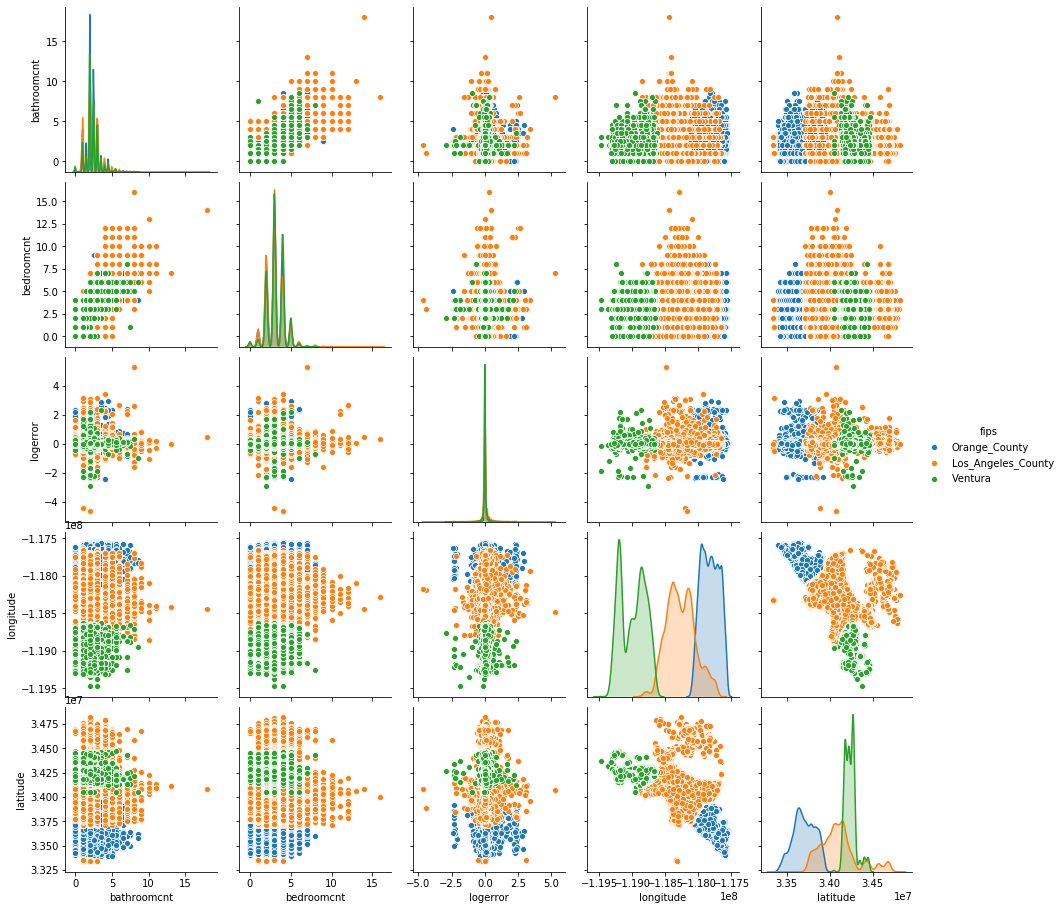

In [8]:
sns.pairplot(df, hue='fips')

# 2. Plot a correlation matrix heatmap.

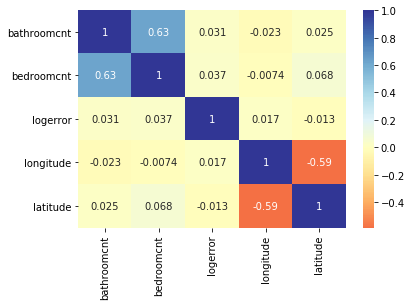

In [9]:
sns.heatmap(df.corr(), cmap='RdYlBu', annot=True, center=0)

# 3. Plot latitude agains longitude.

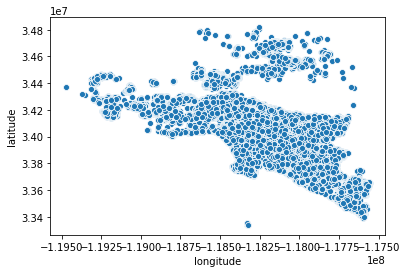

In [10]:
sns.scatterplot(x='longitude', y='latitude', data=df)
plt.show()

# 4. Create a useable plot with 4 dimensions, e.g. x, y, color, size.

In [11]:
train.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'transactiondate',
       'heatingorsystemdesc', 'propertylandusedesc'],
      dtype='object')

In [19]:
sns.scatterplot(data=df, x='latitude', y='longitude', hue='fips', size='taxvaluedollarcnt')

TypeError: 'Series' objects are mutable, thus they cannot be hashed

# 5. Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [ ]:
population_logerror_mean = df.logerror.mean()
zipcode_logerror_mean = df.groupby("regionidzip")['regionidzip','logerror'].mean().reset_index()


f"{population_logerror_mean} is the logerror of the population"

In [ ]:
zipcode_logerror_mean.head()

# 6. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [ ]:
# Null Hypothesis 1: LA County and Orange County have similar logerror
# Null Hypothesis 2: LA Countuy and Ventury County have similar logerror
# Null Hypothesis 3: Orange County and Ventury County have similar logerror

## LA County vs Orange County vs Ventura County?

In [ ]:
la = df[df.fips == "Los_Angeles_County"]
orange = df[df.fips == "Orange_County"]
ventura = df[df.fips == "Ventura"]

In [18]:
alpha = .01 # confidence level of .99

t, p = stats.ttest_ind(la.logerror, orange.logerror)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

NameError: name 'la' is not defined